In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('benign_0__mal_1',axis = 1).values

In [6]:
y = df['benign_0__mal_1'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
X_train = scaler.fit_transform(X_train)

In [11]:
X_test = scaler.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
X_train.shape

(426, 30)

In [14]:
my_model = Sequential()

my_model.add(Dense(30, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Dense(15, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Dense(1, activation='sigmoid'))

my_model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [15]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 25)

In [16]:
my_model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 600, verbose = 1, callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6996 - val_loss: 0.6767
Epoch 2/600
426/426 [==============================] - 0s 148us/sample - loss: 0.6865 - val_loss: 0.6613
Epoch 3/600
426/426 [==============================] - 0s 126us/sample - loss: 0.6672 - val_loss: 0.6451
Epoch 4/600
426/426 [==============================] - 0s 116us/sample - loss: 0.6565 - val_loss: 0.6309
Epoch 5/600
426/426 [==============================] - 0s 117us/sample - loss: 0.6372 - val_loss: 0.6108
Epoch 6/600
426/426 [==============================] - 0s 112us/sample - loss: 0.6159 - val_loss: 0.5837
Epoch 7/600
426/426 [==============================] - 0s 129us/sample - loss: 0.5878 - val_loss: 0.5523
Epoch 8/600
426/426 [==============================] - 0s 112us/sample - loss: 0.5703 - val_loss: 0.5241
Epoch 9/600
426/426 [==============================] - 0s 115us/sample - loss: 0.5496 - val_loss: 0.4886
Epoch 10/60

426/426 [==============================] - 0s 131us/sample - loss: 0.1276 - val_loss: 0.1114
Epoch 78/600
426/426 [==============================] - 0s 124us/sample - loss: 0.1064 - val_loss: 0.1033
Epoch 79/600
426/426 [==============================] - 0s 131us/sample - loss: 0.1196 - val_loss: 0.0978
Epoch 80/600
426/426 [==============================] - 0s 105us/sample - loss: 0.1156 - val_loss: 0.0940
Epoch 81/600
426/426 [==============================] - 0s 112us/sample - loss: 0.1312 - val_loss: 0.1012
Epoch 82/600
426/426 [==============================] - 0s 104us/sample - loss: 0.1177 - val_loss: 0.1168
Epoch 83/600
426/426 [==============================] - 0s 117us/sample - loss: 0.1033 - val_loss: 0.0915
Epoch 84/600
426/426 [==============================] - 0s 108us/sample - loss: 0.1160 - val_loss: 0.1030
Epoch 85/600
426/426 [==============================] - 0s 126us/sample - loss: 0.1091 - val_loss: 0.0927
Epoch 86/600
426/426 [==============================] - 0s 

In [17]:
loss_df = pd.DataFrame(my_model.history.history)

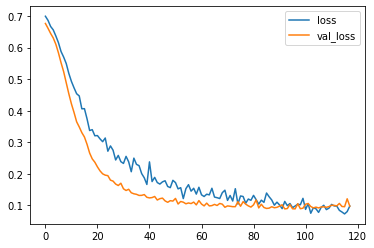

In [18]:
loss_df.plot()

In [19]:
prediction = my_model.predict_classes(X_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [22]:
new_df = df[df['benign_0__mal_1']==1]

In [23]:
new_df = new_df.drop('benign_0__mal_1',axis = 1)

In [24]:
value = new_df.head(1).values

In [25]:
features = scaler.transform(value)

In [26]:
my_model.predict_classes(features)

array([[1]])

In [27]:
new_df1 = df[df['benign_0__mal_1'] == 0]

In [28]:
new_df1 = new_df1.drop('benign_0__mal_1', axis = 1)

In [29]:
value = new_df1.head(1).values

In [30]:
features1 = scaler.transform(value)

In [31]:
my_model.predict_classes(features1)

array([[0]])